### Veri yükleme ve Verinin Karakteristiği

In [125]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm #dekompoze etmek için
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_predict


In [126]:
data = pd.read_csv("solar_panel.csv",index_col="Unnamed: 0",dayfirst=True,)
columns = ['Cumulative_solar_power', 'Gas/day']
data = data.drop(columns,axis=1)
data = data.rename(columns={"kWh electricity/day":"Energy"})
data.head()

Energy
26/10/2011    15.1
27/10/2011     7.4
28/10/2011     5.8
29/10/2011     4.9
30/10/2011    11.7

In [127]:
print(data.tail()) # Verinin sonunda boş veriler bulunuyor.

            Energy
28/04/2022     NaN
29/04/2022     NaN
30/04/2022     NaN
1/05/2022      NaN
2/05/2022      NaN


In [128]:
print(data.isna().sum()) # 64 boş değer.
data = data.dropna() # Nan değerleri droplama

Energy    64
dtype: int64


<AxesSubplot:>

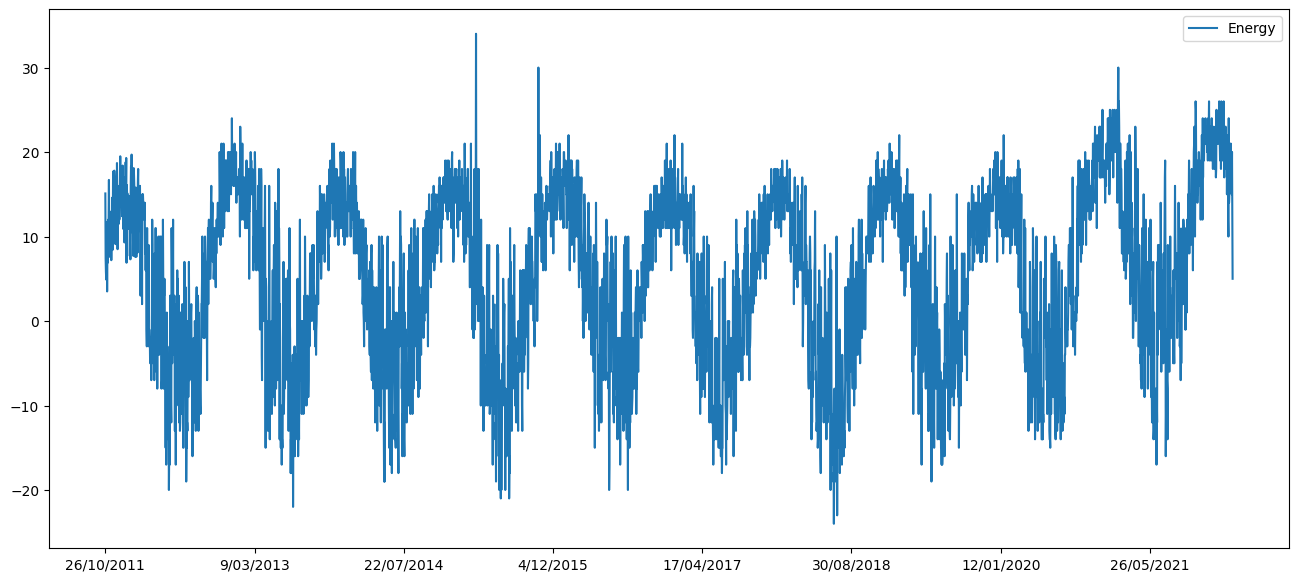

In [129]:
data.plot(figsize=(16,7))

Yıllık zaman serisi verimizde belirli bir yükseliş veya trend gözükmüyor. Verinin en güçlü karakteristik özelliği güneşten kaynaklı sezonalitesi olabilir. Her sene tekrar eden şekilde mevsimsel özellikler veriye yansıyor ve artıp azalan periyodu 1 sene olan bir mevsimsellik ortaya çıkıyor. Verinin bazı noktalarında irregularity'ler bulunuyor. Ancak bunlar verinin kalan düzenini bozmuyorlar.

### Zaman Serisi Analizi:

Durağanlık:<p> zaman serimizin belirgin bir trendi yok. Aynı zamanda ortlaması ve standart sapması da sabit gibi gözüküyor o yüzden durağan bir serimiz var diyebiliriz. Yine de bunu teyit etmek için ADF testini uygulayalım.

In [130]:
adf_result = adfuller(data["Energy"])
print("p-value",adf_result[1])

p-value 0.005626348001864952


p değerimiz <= 0.05 değerini sağladığı için verimizü durağan kabul edebiliriz

Koralasyon:<p> Bir verideki en önemli şeylerden biri ise verilerin önceki verilerle aralarındaki koralasyonudur. Önceki değerler ile aralarındaki ilişkiyi ACF ve PACF ile hesaplayabiliriz. Bunlar verinin önceki adımlarıyla ilişkiyi hesapladığı için AutoCorrelation Function deniliyor. 

ACF: acf noktaların birbiriyle uzaklıklarını da baz alarak(lag) korelasyonu gösterir.y(t) ile y(t-1). 2. lagda y(t) ile y(t-1) ve y(t-2), 3. lagda ...<p>
PACF: pacf sadece 2 nokta arası korelasyonu gösterir. y(t) ile y(t-1), y(t) ile y(t-2) gibi...

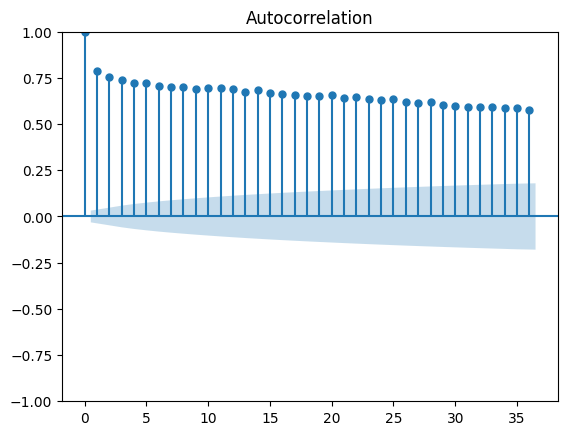

c:\Users\yigit\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


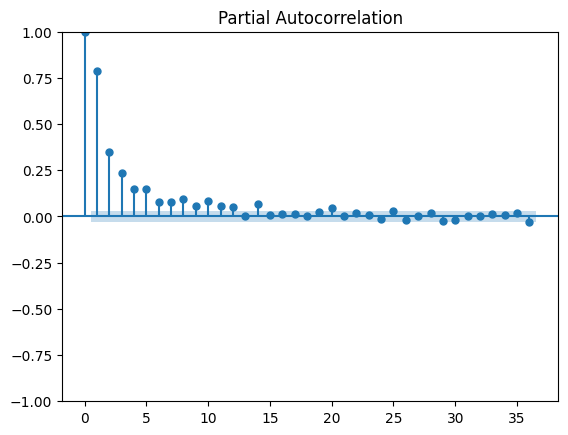

In [131]:
plot_acf(data["Energy"])
plt.show()
plot_pacf(data["Energy"])
plt.show()

In [132]:
from pmdarima.arima import auto_arima
    
auto_arima(y=data,
           seasonal=True,
           trace=True #so that you can see what is happening.
)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=23580.397, Time=0.93 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=24988.236, Time=0.25 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=24276.263, Time=0.36 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=23646.546, Time=0.53 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=24986.237, Time=0.23 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=23572.053, Time=1.63 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=23583.984, Time=0.67 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=23576.404, Time=0.74 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=23587.884, Time=0.96 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=23578.023, Time=0.99 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=23573.784, Time=0.98 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=23576.036, Time=1.70 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=23570.061, Time=0.84 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=23581.990, Time=0.40 sec
 ARIMA(1,1,1)(0,0,0

ARIMA(order=(1, 1, 2), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

### Model ve Tahmin

1-ARIMA(p, d, q). These three parameters account for seasonality, trend, and noise in data.<p>
2-And p is for ar q is for ma, d is for differencing.

c:\Users\yigit\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:557: UserWarning: Parsing '26/10/2011' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  _index = to_datetime(index)
c:\Users\yigit\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:557: UserWarning: Parsing '27/10/2011' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  _index = to_datetime(index)
c:\Users\yigit\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:557: UserWarning: Parsing '28/10/2011' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  _index = to_datetime(index)
c:\Users\yigit\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:557: UserWarning: Parsing '29/10/2011' in DD/MM/YYYY format. Provide

                               SARIMAX Results                                
Dep. Variable:                 Energy   No. Observations:                 3778
Model:                 ARIMA(1, 1, 0)   Log Likelihood              -12135.132
Date:                Fri, 28 Jun 2024   AIC                          24274.263
Time:                        11:32:52   BIC                          24286.736
Sample:                             0   HQIC                         24278.697
                               - 3778                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4151      0.013    -31.282      0.000      -0.441      -0.389
sigma2        36.1543      0.643     56.221      0.000      34.894      37.415
Ljung-Box (L1) (Q):                  48.90   Jarque-

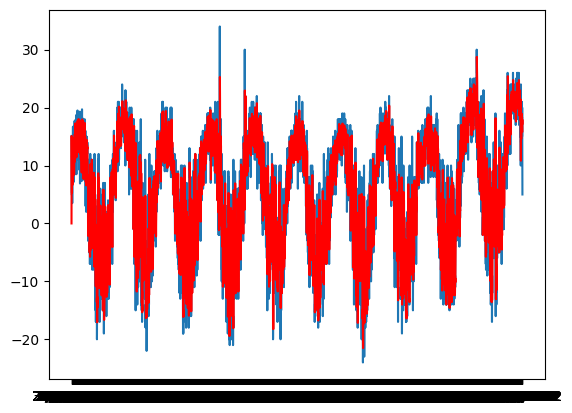

In [133]:
#AR model:
model_ar = sm.tsa.arima.ARIMA(data, order=(1, 1, 0))
model_Ar_fit = model_ar.fit()

print(model_Ar_fit.summary())

plt.plot(data["Energy"])
plt.plot(model_Ar_fit.fittedvalues,color="red")

print("model (Root-Sum-Square)RSS: %.4f"% sum((model_Ar_fit.fittedvalues- data["Energy"])**2))

c:\Users\yigit\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:557: UserWarning: Parsing '26/10/2011' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  _index = to_datetime(index)
c:\Users\yigit\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:557: UserWarning: Parsing '27/10/2011' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  _index = to_datetime(index)
c:\Users\yigit\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:557: UserWarning: Parsing '28/10/2011' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  _index = to_datetime(index)
c:\Users\yigit\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:557: UserWarning: Parsing '29/10/2011' in DD/MM/YYYY format. Provide

                               SARIMAX Results                                
Dep. Variable:                 Energy   No. Observations:                 3778
Model:                 ARIMA(0, 1, 2)   Log Likelihood              -11787.995
Date:                Fri, 28 Jun 2024   AIC                          23581.990
Time:                        11:33:24   BIC                          23600.700
Sample:                             0   HQIC                         23588.641
                               - 3778                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.6733      0.014    -47.328      0.000      -0.701      -0.645
ma.L2         -0.1311      0.014     -9.363      0.000      -0.159      -0.104
sigma2        30.0798      0.575     52.281      0.0

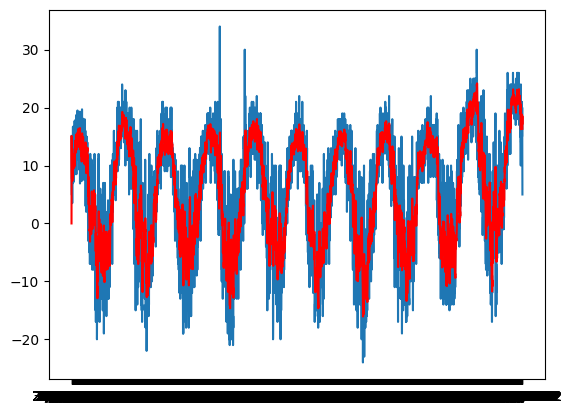

In [134]:
#MA model:
model_ma = sm.tsa.arima.ARIMA(data, order=(0, 1, 2))
model_ma_fit = model_ma.fit()

print(model_ma_fit.summary())

plt.plot(data["Energy"])
plt.plot(model_ma_fit.fittedvalues,color="red")

print("model (Root-Sum-Square)RSS: %.4f"% sum((model_ma_fit.fittedvalues- data["Energy"])**2))

In [ ]:
# ARIMA Model:

model = sm.tsa.arima.ARIMA(data, order=(1, 1, 2))
model_fit = model.fit()

print(model_fit.summary())

plt.plot(data["Energy"])
plt.plot(model_fit.fittedvalues,color="red")

print("model (Root-Sum-Square)RSS: %.4f"% sum((model_fit.fittedvalues- data["Energy"])**2))

RSS sonuçlarına göre en iyi tahmin eden birleşik model oldu.<p>

### Forecasting

<AxesSubplot:>

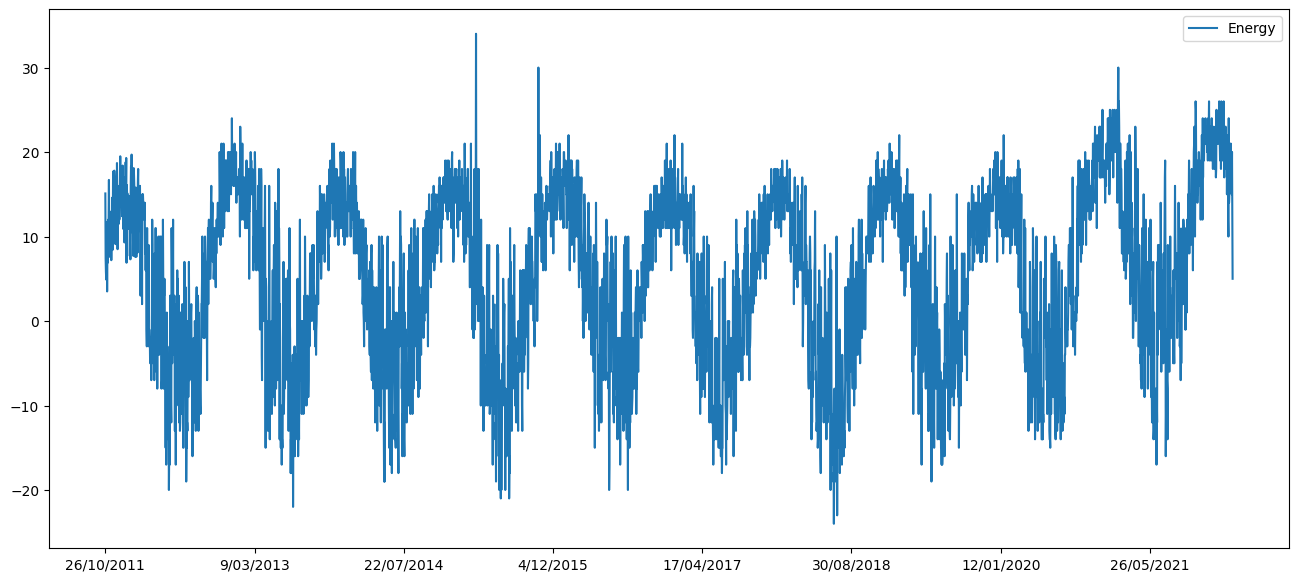

In [136]:
data.plot(figsize=(16,7))

Elimizde yaklaşık 10 senelik veri var ve biz bir sonraki seneyi tahmin etmek istiyoruz yani sonraki 365 gözlemi. Bunu yapmak için tahmin yaptığımız en iyi sonuç veren fit edilmiş modeli kullanıyoruz.

In [137]:
# Bir adım ötesini görme:
fcast = model_fit.get_forecast()
print(fcast.summary_frame(alpha=0.10)) #alpha güven aralığını verir 0.1=%90 güven aralığı. default=%95

Energy       mean   mean_se  mean_ci_lower  mean_ci_upper
3778    13.133892  5.474391       4.129319      22.138464


c:\Users\yigit\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [138]:
# iki adım ötesi:
fcast2 = model_fit.get_forecast(steps=2)
print(fcast2.summary_frame(alpha=0.10))

Energy       mean   mean_se  mean_ci_lower  mean_ci_upper
3778    13.133892  5.474391       4.129319      22.138464
3779    14.257675  5.762011       4.780010      23.735340


c:\Users\yigit\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


c:\Users\yigit\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


<AxesSubplot:>

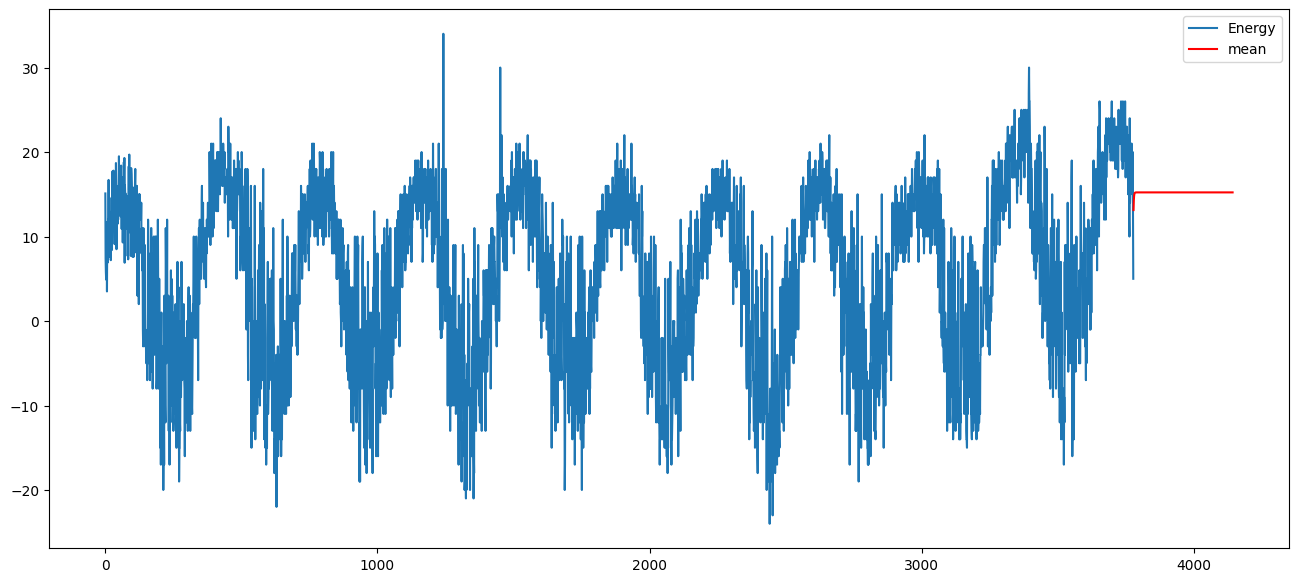

In [147]:
# 1 yıl ötesi:
fcast365 = model_fit.get_forecast(steps=365)
f_mean = fcast365.summary_frame()["mean"]
f_mean_reset = f_mean.reset_index(drop=True)

data = data.reset_index(drop=True)

index_series = range(3778, 4143)
f_data = pd.DataFrame(f_mean_reset)
f_data.index = index_series

fig, ax = plt.subplots(figsize=(16, 7))
data.plot(ax=ax)
f_data.plot(ax=ax,color="red")